In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [28]:
df = pd.read_csv("IceCreamData.csv")
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [3]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


In [5]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

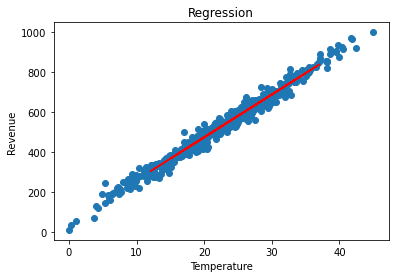

In [61]:
plt.scatter(df['Temperature'],df['Revenue'])
plt.plot(x_test,y_pred,color='red')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Regression')
plt.show()

In [11]:
df.shape

(500, 2)

In [31]:
# linear regression will need the inputs in 1d array, therefore converting it into 1d using reshape
x_train,x_test,y_train,y_test = train_test_split(df['Temperature'].values.reshape(-1,1),df['Revenue'].values.reshape(-1,1),test_size=0.1)

In [17]:
lr = LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred=lr.predict(x_test)

In [41]:
prediction = pd.DataFrame(x_test,columns=['x'])

In [42]:
prediction['y_test'] = y_test
prediction['y_pred'] = y_pred

In [43]:
prediction['Residuals'] = y_pred - y_test

In [44]:
prediction

,x,y_test,y_pred,Residuals
0,25.457836,612.153949,590.915669,-21.238280
1,29.430578,618.235765,675.982817,57.747052
2,27.599066,634.121978,636.765193,2.643215
3,30.427792,704.281439,697.335851,-6.945588
4,24.802577,563.301280,576.884790,13.583510
5,24.521847,538.312890,570.873601,32.560711
6,23.349034,586.138767,545.760514,-40.378253
7,21.026398,521.775445,496.026598,-25.748848
8,14.866103,296.906532,364.118036,67.211504
9,25.002380,550.701404,581.163110,30.461707


In [45]:
lr.coef_

array([[21.41270325]])

In [46]:
lr.intercept_

array([45.79457379])

In [49]:
x = df['Temperature'].sample(1)
x

415    20.016384
Name: Temperature, dtype: float64

In [52]:
y_pred1 = 20.016384*lr.coef_ + lr.intercept_
y_pred1

array([[474.39946457]])

In [53]:
df.iloc[415,:]

Temperature     20.016384
Revenue        477.315188
Name: 415, dtype: float64

In [60]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae

20.185042710307865

In [63]:
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse

634.0643367410028